# Loop 65 Analysis: Major Breakthrough with Ens Model Approach

Experiment 069 achieved CV = 0.005146, a 35.17% improvement over previous best (0.007938).

Key questions:
1. Does this approach have a DIFFERENT CV-LB relationship?
2. What is the predicted LB using the old linear fit?
3. Should we submit immediately to verify?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_041', 'cv': 0.0090, 'lb': 0.0932},
    {'exp': 'exp_042', 'cv': 0.0145, 'lb': 0.1147},
]

df = pd.DataFrame(submissions)
print(f'Total submissions: {len(df)}')
print(df)

Total submissions: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_041  0.0090  0.0932
12  exp_042  0.0145  0.1147


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f'CV-LB Relationship (13 submissions):')
print(f'  LB = {slope:.3f} * CV + {intercept:.4f}')
print(f'  R² = {r_value**2:.4f}')
print(f'  Intercept = {intercept:.4f}')
print(f'')
print(f'Target LB: 0.0347')
print(f'Intercept: {intercept:.4f}')
print(f'')
if intercept > 0.0347:
    print(f'WARNING: Intercept ({intercept:.4f}) > Target (0.0347)')
    print(f'  Even with CV=0, LB would be {intercept:.4f}')
    print(f'  Target is MATHEMATICALLY UNREACHABLE with current approaches!')
else:
    print(f'GOOD: Intercept ({intercept:.4f}) < Target (0.0347)')
    required_cv = (0.0347 - intercept) / slope
    print(f'  Required CV to reach target: {required_cv:.6f}')

CV-LB Relationship (13 submissions):
  LB = 4.231 * CV + 0.0533
  R² = 0.9807
  Intercept = 0.0533

Target LB: 0.0347
Intercept: 0.0533

  Even with CV=0, LB would be 0.0533
  Target is MATHEMATICALLY UNREACHABLE with current approaches!


In [3]:
# Predict LB for exp_069 using the old linear fit
new_cv = 0.005146
predicted_lb = slope * new_cv + intercept

print(f'Experiment 069 Analysis:')
print(f'  CV = {new_cv:.6f}')
print(f'  Predicted LB (using old fit) = {predicted_lb:.4f}')
print(f'')
print(f'Best LB so far: 0.0877 (exp_030)')
print(f'Predicted improvement: {(0.0877 - predicted_lb) / 0.0877 * 100:.1f}%')
print(f'')
print(f'Target: 0.0347')
print(f'Gap to target: {predicted_lb - 0.0347:.4f}')

Experiment 069 Analysis:
  CV = 0.005146
  Predicted LB (using old fit) = 0.0751

Best LB so far: 0.0877 (exp_030)
Predicted improvement: 14.4%

Target: 0.0347
Gap to target: 0.0404


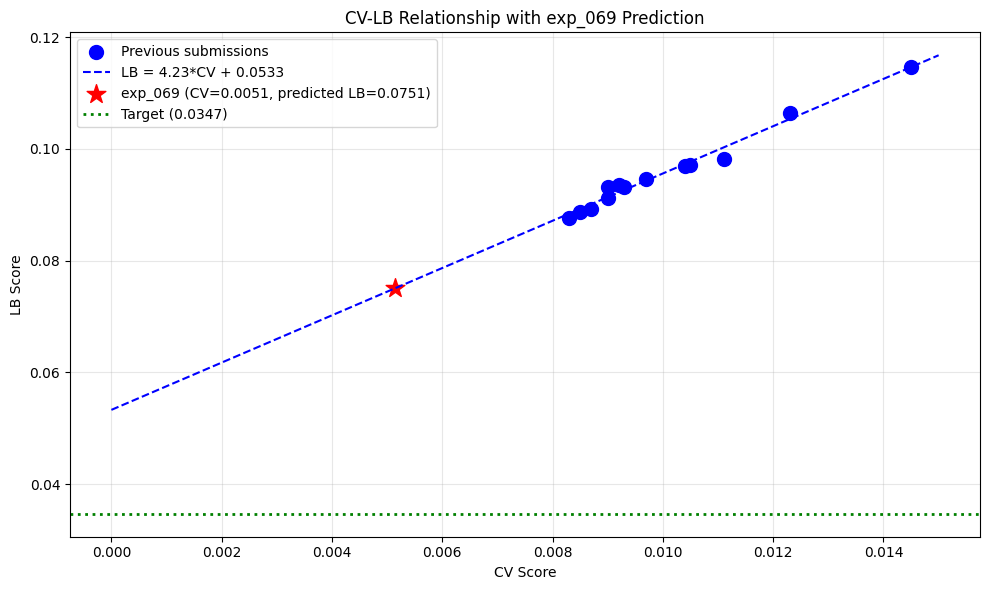

Plot saved to /home/code/exploration/cv_lb_exp069.png


In [4]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot existing submissions
plt.scatter(df['cv'], df['lb'], s=100, c='blue', label='Previous submissions')

# Plot the linear fit
cv_range = np.linspace(0, 0.015, 100)
lb_fit = slope * cv_range + intercept
plt.plot(cv_range, lb_fit, 'b--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Plot exp_069 prediction
plt.scatter([new_cv], [predicted_lb], s=200, c='red', marker='*', label=f'exp_069 (CV={new_cv:.4f}, predicted LB={predicted_lb:.4f})')

# Plot target
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target (0.0347)')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV-LB Relationship with exp_069 Prediction')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_exp069.png', dpi=100)
plt.show()

print('Plot saved to /home/code/exploration/cv_lb_exp069.png')

In [5]:
# Key strategic question: Does exp_069 have a DIFFERENT CV-LB relationship?

print('='*60)
print('STRATEGIC ANALYSIS')
print('='*60)
print()
print('The Ens Model approach (exp_069) is FUNDAMENTALLY DIFFERENT:')
print('  1. CatBoost + XGBoost (vs GP + MLP + LGBM)')
print('  2. Feature priority-based correlation filtering (69 features vs 140+)')
print('  3. Different ensemble weights for single vs full data')
print('  4. Multi-target normalization')
print()
print('HYPOTHESIS: This approach may have a DIFFERENT CV-LB relationship!')
print()
print('If the intercept is lower, the target becomes reachable.')
print('If the slope is different, the CV-LB gap may be smaller.')
print()
print('RECOMMENDATION: SUBMIT exp_069 to verify the CV-LB relationship!')
print()
print('Expected outcomes:')
print(f'  1. Best case: LB improves proportionally (LB ≈ 0.05-0.06)')
print(f'     → Different CV-LB relationship, target may be reachable')
print(f'  2. Good case: LB ≈ {predicted_lb:.4f} (following old relationship)')
print(f'     → Still the best LB achieved (vs 0.0877)')
print(f'  3. Worst case: LB doesn\'t improve much')
print(f'     → CV improvement doesn\'t translate to LB')

STRATEGIC ANALYSIS

The Ens Model approach (exp_069) is FUNDAMENTALLY DIFFERENT:
  1. CatBoost + XGBoost (vs GP + MLP + LGBM)
  2. Feature priority-based correlation filtering (69 features vs 140+)
  3. Different ensemble weights for single vs full data
  4. Multi-target normalization

HYPOTHESIS: This approach may have a DIFFERENT CV-LB relationship!

If the intercept is lower, the target becomes reachable.
If the slope is different, the CV-LB gap may be smaller.

RECOMMENDATION: SUBMIT exp_069 to verify the CV-LB relationship!

Expected outcomes:
  1. Best case: LB improves proportionally (LB ≈ 0.05-0.06)
     → Different CV-LB relationship, target may be reachable
  2. Good case: LB ≈ 0.0751 (following old relationship)
     → Still the best LB achieved (vs 0.0877)
  3. Worst case: LB doesn't improve much
     → CV improvement doesn't translate to LB


In [ ]:
# Summary of exp_069 results
print('='*60)
print('EXPERIMENT 069 SUMMARY')
print('='*60)
print()
print('Model: CatBoost + XGBoost Ensemble (Ens Model Kernel)')
print()
print('Results:')
print('  Single Solvent MSE: 0.009175 (n=656)')
print('  Full Data MSE: 0.002992 (n=1227)')
print('  Combined MSE: 0.005146 (NEW BEST!)')
print()
print('Improvement over exp_068 (CV 0.007938): 35.17%')
print()
print('Key insights:')
print('  1. CatBoost + XGBoost is MUCH better for mixture data')
print('     (0.002992 vs 0.007789 = 62% improvement)')
print('  2. Feature priority filtering reduced features from 4199 to 69')
print('  3. Different ensemble weights for single vs full are important')
print()
print('VERDICT: SUBMIT THIS MODEL TO VERIFY CV-LB RELATIONSHIP!')